# CAES Dataset Notebook
## 4. Data Analysis

Tests related to the CAES essay dataset.

### Load dataset

In [23]:
import pandas as pd

df = pd.read_csv("caes/cleaned_caes.csv")
print("Shape:", df.shape)
df

Shape: (26653, 5)


,essay_id,full_text,score,word_count,prompt_name
0,0,hola carlos ! hace mucho que no te veo hombre ...,B1,212,Carta amigo
1,1,"hola querida sara , espero que estes muy bien ...",A2,175,Carta amigo
2,2,como estais ? ! hola amigos ! ? espero que tod...,A1,104,Postal vacaciones
3,3,"cuando llegué a el destino , le propuso que si...",A2,135,Postal vacaciones
4,4,¿ que tal ? un beso espero que todo va bien po...,A1,80,Familia
...,...,...,...,...,...
26648,26648,buenas tardes ! 29_de_mayo_de_2019 salamanca q...,B1,299,Carta amigo
26649,26649,tengo la seguridad de mí mismo para contener e...,B2,157,Solicitud admisión
26650,26650,"distinguidos señor / señra : hola , gerente . ...",B1,178,Reclamación compañía aérea
26651,26651,le escribo esta carta porque me gustaría inmen...,B2,303,Solicitud admisión


In [24]:
print("Column names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Column names: ['essay_id', 'full_text', 'score', 'word_count', 'prompt_name']

Data types:
 essay_id        int64
full_text      object
score          object
word_count      int64
prompt_name    object
dtype: object

Missing values:
 essay_id       0
full_text      0
score          0
word_count     0
prompt_name    0
dtype: int64


In [25]:
df[["word_count"]].describe()

,word_count
count,26653.000000
mean,185.708025
std,84.704274
min,80.000000
25%,123.000000
50%,164.000000
75%,227.000000
max,771.000000


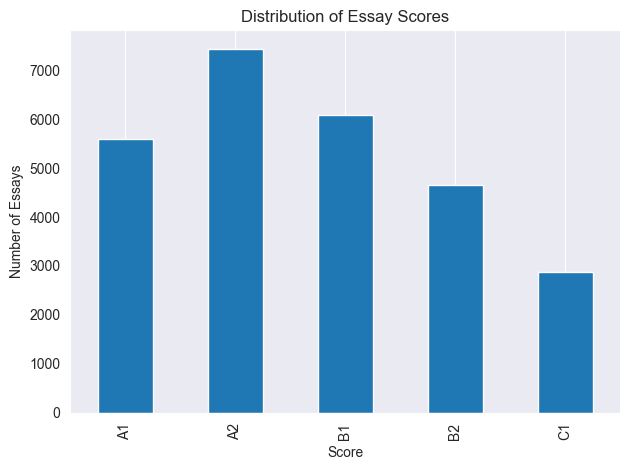

In [26]:
import matplotlib.pyplot as plt

df["score"].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Essay Scores")
plt.xlabel("Score")
plt.ylabel("Number of Essays")
plt.grid(axis="y")
plt.tight_layout()

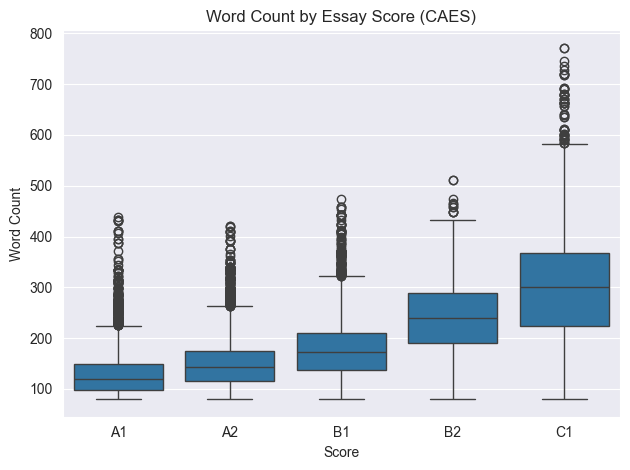

In [33]:
import seaborn as sns

# define order
order = ["A1","A2","B1","B2","C1"]
df["score"] = pd.Categorical(df["score"], categories=order, ordered=True)

# plot
sns.boxplot(data=df, x="score", y="word_count")
plt.title("Word Count by Essay Score (CAES)")
plt.xlabel("Score")
plt.ylabel("Word Count")
plt.tight_layout()

In [37]:
df.groupby("score")["word_count"].agg(['count','mean','median','std'])

/var/folders/4n/slwln6451ql9kp_wwdcstgf00000gn/T/ipykernel_15988/3238444863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("score")["word_count"].agg(['count','mean','median','std'])


,count,mean,median,std
score,,,,
A1,5599,130.937846,119.0,45.547215
A2,7440,151.941801,143.0,50.012279
B1,6079,178.462905,173.0,57.701849
B2,4658,240.350580,239.0,69.142278
C1,2877,306.457769,301.0,113.500011
